<a href="https://colab.research.google.com/github/safa54f4/UTS_TeknologiData/blob/main/uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Teknologi Data/trip.csv')
print(data)
data.head()

        trip_id         starttime  ...  gender birthyear
0           431  10/13/2014 10:31  ...    Male    1960.0
1           432  10/13/2014 10:32  ...    Male    1970.0
2           433  10/13/2014 10:33  ...  Female    1988.0
3           434  10/13/2014 10:34  ...  Female    1977.0
4           435  10/13/2014 10:34  ...    Male    1971.0
...         ...               ...  ...     ...       ...
236060   255241   8/31/2016 23:34  ...     NaN       NaN
236061   255242   8/31/2016 23:48  ...     NaN       NaN
236062   255243   8/31/2016 23:47  ...     NaN       NaN
236063   255244   8/31/2016 23:49  ...     NaN       NaN
236064   255245   8/31/2016 23:49  ...     NaN       NaN

[236065 rows x 12 columns]


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


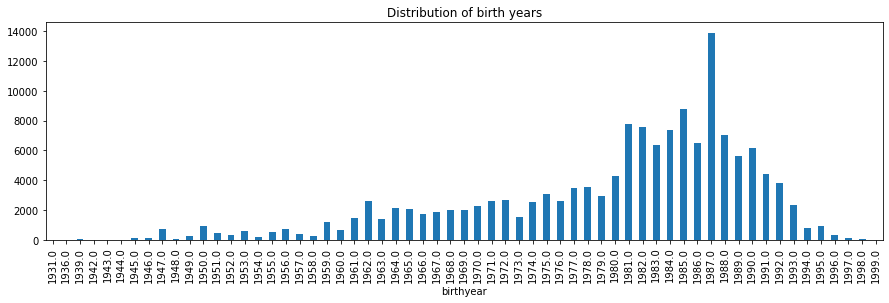

In [ ]:
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title = 'Distribution of birth years',
figsize = (15,4))

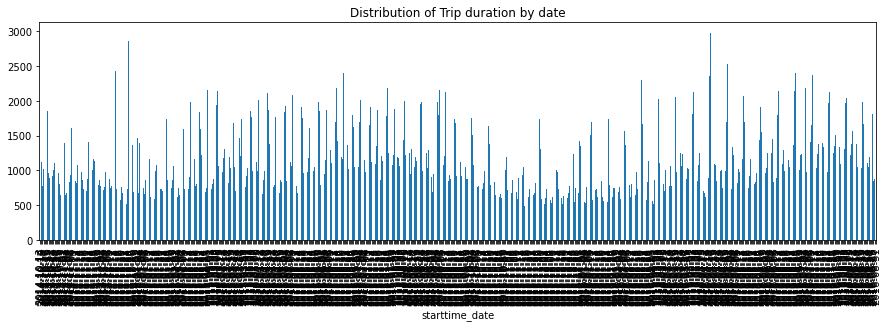

In [ ]:
List_ = list(data['starttime'])
List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)

data.groupby('starttime_date')['tripduration'].mean().plot.bar(title = 'Distribution of Trip duration by date', figsize = (15,4))

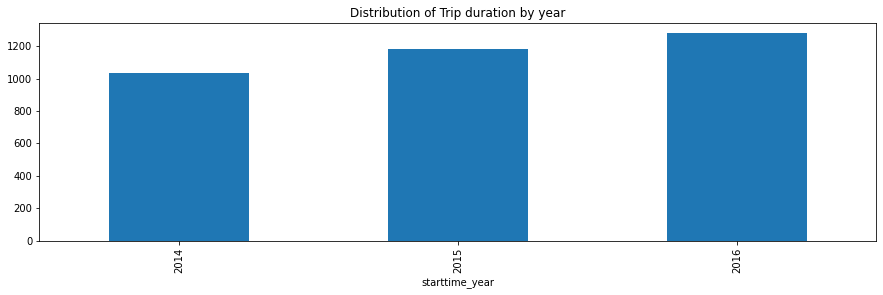

In [ ]:
#Year
List_ = list(data['starttime'])
List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)

data.groupby('starttime_year')['tripduration'].mean().plot.bar(title = 'Distribution of Trip duration by year', figsize = (15,4))

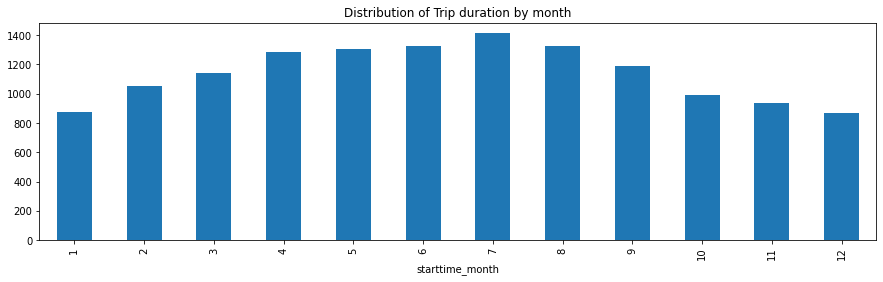

In [ ]:
#Mounth
data.groupby('starttime_month')['tripduration'].mean().plot.bar(title = 'Distribution of Trip duration by month', figsize = (15,4))

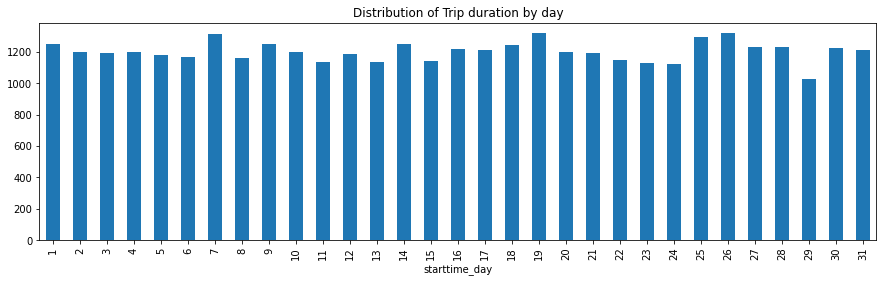

In [ ]:
#Day
data.groupby('starttime_day')['tripduration'].mean().plot.bar(title = 'Distribution of Trip duration by day', figsize = (15,4))

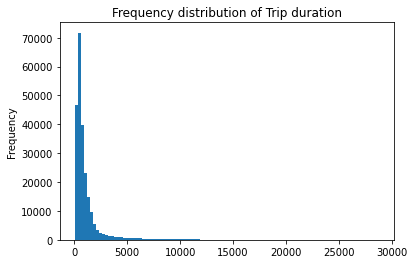

In [ ]:
#Daily
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration')
plt.show()

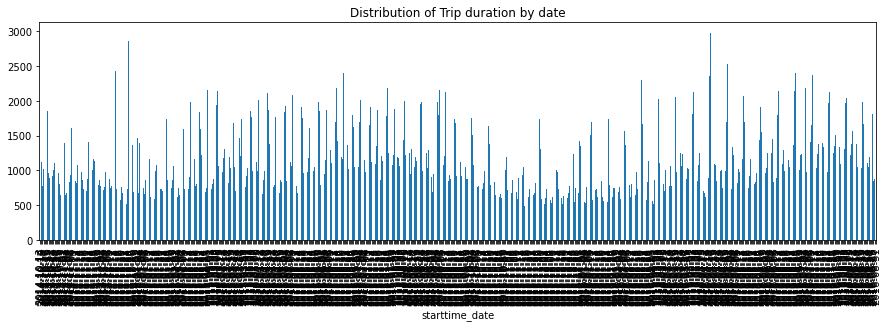

In [ ]:
data.groupby('starttime_date')['tripduration'].mean().plot.bar(title = 'Distribution of Trip duration by date', figsize = (15,4))

In [ ]:
trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
print('Mean of trip duration: %f'%statistics.mean(trip_duration))
print('Median of trip duration: %f'%statistics.median(trip_duration))
print('Mode of station originating from: %s'%statistics.mode(station_from))

Mean of trip duration: 1202.612210
Median of trip duration: 633.235000
Mode of station originating from: Pier 69 / Alaskan Way & Clay St


In [ ]:
q75, q25 = np.percentile(trip_duration, [75 ,25])
iqr = q75 - q25
print('Proportion of values as outlier: %f percent'%(
(len(data) - len([x for x in trip_duration if q75+(1.5*iqr)
>=x>= q25-(1.5*iqr)]))*100/float(len(data))))

Proportion of values as outlier: 9.548218 percent


In [ ]:
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr)>=x>= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print('Mean of trip duration: %f'%mean_trip_duration)

Mean of trip duration: 711.726573


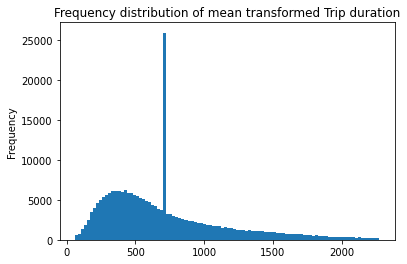

In [ ]:
def transform_tripduration(x):
  if x > upper_whisker:
    return mean_trip_duration
  return x
data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))
data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

In [ ]:
print('Mean of trip duration: %f'%data['tripduration_mean'].mean())
print('Standard deviation of trip duration: %f'%data['tripduration_mean'].std())
print('Median of trip duration: %f'%data['tripduration_mean'].median())


Mean of trip duration: 711.726573
Standard deviation of trip duration: 435.517297
Median of trip duration: 633.235000


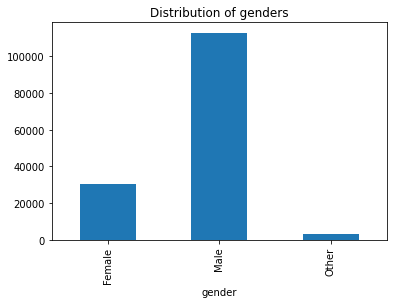

In [ ]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of genders')

Mean of trip duration: 526.952305
Standard deviation of trip duration: 711.726573
Median of trip duration: 458.451500


/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:2832: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  order=order, subok=True, ndmin=ndmin)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes)

Text(0.5, 0.98, 'Skewness Plotting')

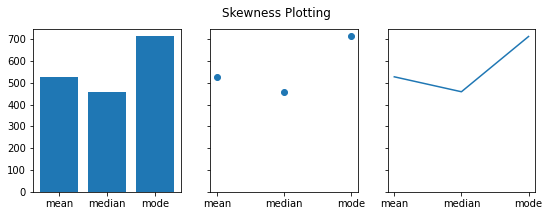

In [ ]:
groupby_gender = data.groupby('gender')
gmale=groupby_gender.get_group('Male')
print('Mean of trip duration: %f'%gmale['tripduration_mean'].mean())
print('Standard deviation of trip duration: %f'%gmale['tripduration_mean'].mode())
print('Median of trip duration: %f'%gmale['tripduration_mean'].median())
me = gmale['tripduration_mean'].mean()
med = gmale['tripduration_mean'].median()
st = gmale['tripduration_mean'].mode()
data = {'mean': me, 'median': med, 'mode': st}
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Skewness Plotting')


In [ ]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of genders')

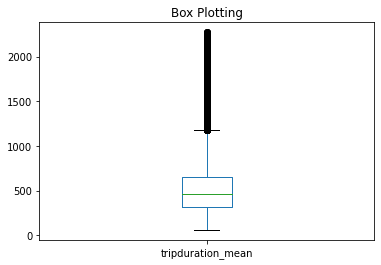

In [ ]:
gmale['tripduration_mean'].plot.box(title='Box Plotting')